In [1]:
# code taken from https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/, adapted to use LSTM instead of SimpleRNN

In [2]:
n = 4

In [3]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import json

Epoch 1/20


2023-06-28 01:46:18.398147: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


187/187 - 1s - loss: 0.0325 - 598ms/epoch - 3ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0407 - 190ms/epoch - 1ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0147 - 193ms/epoch - 1ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0144 - 184ms/epoch - 986us/step
Epoch 5/20
187/187 - 0s - loss: 0.0140 - 173ms/epoch - 924us/step
Epoch 6/20
187/187 - 0s - loss: 0.0135 - 247ms/epoch - 1ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0131 - 261ms/epoch - 1ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0125 - 200ms/epoch - 1ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0120 - 274ms/epoch - 1ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0117 - 191ms/epoch - 1ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0113 - 187ms/epoch - 1000us/step
Epoch 12/20
187/187 - 0s - loss: 0.0112 - 181ms/epoch - 969us/step
Epoch 13/20
187/187 - 0s - loss: 0.0107 - 172ms/epoch - 919us/step
Epoch 14/20
187/187 - 0s - loss: 0.0103 - 177ms/epoch - 945us/step
Epoch 15/20
187/187 - 0s - loss: 0.0100 - 174ms/epoch - 933us/step
Epoch 16/20
187/187 - 0s - los

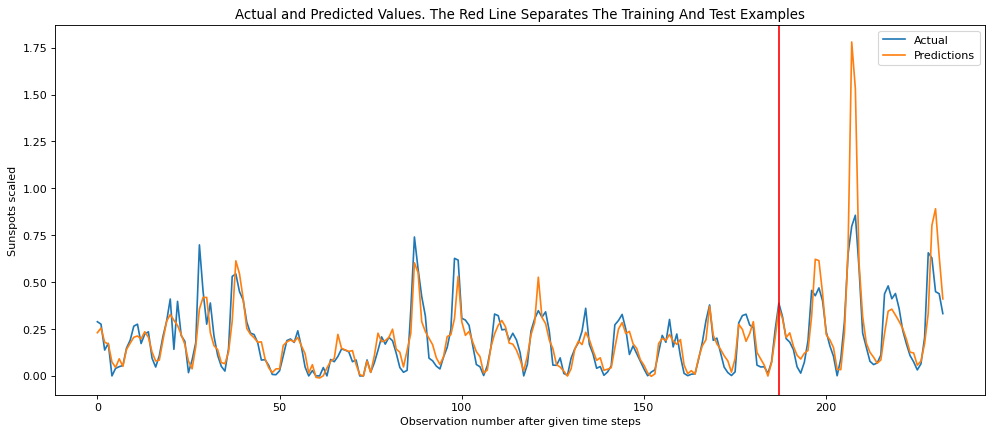

In [4]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], recurrent_activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['linear', 'linear'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

#Plot result
plot_result(trainY, testY, train_predict, test_predict)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3)                 60        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [6]:
W = (model.get_weights()[0]*float(10**n)).round().astype(int)
U = (model.get_weights()[1]*float(10**n)).round().astype(int)
bh = (model.get_weights()[2]*float(10**(2*n))).round().astype(int)
wy = model.get_weights()[3]
by = model.get_weights()[4]

print('W = ', W, ' U = ', U, ' bh = ', bh, ' wy =', wy, 'by = ', by)

W =  [[-3319   566 -1578 -2957  3974 -5025 -2769 -6210   528 -2453 -6260  5707]]  U =  [[-5396 -2948  3950 -1550  4456  -384  2978 -2222  -368 -3215   865  1047]
 [-3351 -1697  4116  -839 -6515   239   166  3781 -4429   557 -1759  1865]
 [ 1053 -1353  2090  3354  2252 -6199   213  3513 -1876  1033  2213  -335]]  bh =  [  3803109 -11133725 -20609630  92187576 105593072 132183744   3413040
  -7986690 -14501236   3794992  -9163962 -10348777]  wy = [[ 0.7338229 ]
 [-0.21101092]
 [ 0.5340142 ]] by =  [0.16915093]


In [7]:
wi = W[:,:3]
wf = W[:,3:6]
wc = W[:,6:9]
wo = W[:,9:]

ui = U[:,:3]
uf = U[:,3:6]
uc = U[:,6:9]
uo = U[:,9:]

bi = bh[:3]
bf = bh[3:6]
bc = bh[6:9]
bo = bh[9:]

print('wi = ', wi, ' ui = ', ui, ' wf = ', wf, ' uf = ', uf, ' wc = ', wc, ' uc = ', uc, ' wo = ', wo, ' uo = ', uo)


wi =  [[-3319   566 -1578]]  ui =  [[-5396 -2948  3950]
 [-3351 -1697  4116]
 [ 1053 -1353  2090]]  wf =  [[-2957  3974 -5025]]  uf =  [[-1550  4456  -384]
 [ -839 -6515   239]
 [ 3354  2252 -6199]]  wc =  [[-2769 -6210   528]]  uc =  [[ 2978 -2222  -368]
 [  166  3781 -4429]
 [  213  3513 -1876]]  wo =  [[-2453 -6260  5707]]  uo =  [[-3215   865  1047]
 [  557 -1759  1865]
 [ 1033  2213  -335]]


In [8]:
X = (testX[0]*float(10**n)).round().astype(int)
print('X = ', X)

X =  [[5221]
 [5063]
 [3306]
 [4307]
 [4598]
 [5134]
 [5717]
 [5426]
 [3968]
 [4921]
 [2931]
 [3499]]


In [9]:
h = [np.zeros(3).astype(int)]
c = [np.zeros(3).astype(int)]
out = []
remainder = []
for j in range(12):
    f = np.dot(X[j], wf) + np.dot(h[-1],uf) + bf
    i = np.dot(X[j], wi) + np.dot(h[-1],ui) + bi
    o = np.dot(X[j], wo) + np.dot(h[-1],uo) + bo
    candidate = np.dot(X[j], wc) + np.dot(h[-1],uc) + bc
    C = np.multiply(f,c[-1]) + np.multiply(i,candidate)
    H = np.multiply(o, c[-1])
    print("C = ", C, " H = ", H)
    oc = C // 10**(2*n)
    oh = H // 10**(3*n)
    rc = C - oc*10**(2*n)
    rh = H - oh*10**(3*n)
    h.append(oh)
    c.append(oc)
    out.append(oh.astype(str).flatten().tolist()+oc.astype(str).flatten().tolist())
    remainder.append(rh.astype(str).flatten().tolist()+rc.astype(str).flatten().tolist())
    print('oc = ', oc, ' oh = ', oh, ' rc = ', rc, ' rh = ', rh)


with open('out.json', 'w') as f:
    json.dump(out , f)

with open('remainder.json', 'w') as f:
    json.dump(remainder , f)

C =  [149373176349510 330491441214900 338811042697664]  H =  [0 0 0]
oc =  [1493731 3304914 3388110]  oh =  [0 0 0]  rc =  [76349510 41214900 42697664]  rh =  [0 0 0]
C =  [253234128739451 741464772245316 699922901869358]  H =  [ -12882753214857 -135033306492588   62835088466040]
oc =  [2532341 7414647 6999229]  oh =  [ -13 -136   62]  rc =  [28739451 72245316  1869358]  rh =  [117246785143 966693507412 835088466040]
C =  [ 247645521403106 1148810010940970 1128690186292364]  H =  [ -10849908711117 -218690097354039   57607462250576]
oc =  [ 2476455 11488100 11286901]  oh =  [ -11 -219   57]  rc =  [21403106 10940970 86292364]  rh =  [150091288883 309902645961 607462250576]
C =  [ 280332192400522 1722728665125008 1563850171883109]  H =  [ -16834485422280 -409251327673500  155671478144725]
oc =  [ 2803321 17227286 15638501]  oh =  [ -17 -410  155]  rc =  [92400522 65125008 71883109]  rh =  [165514577720 748672326500 671478144725]
C =  [ 315247001241928 2484473040318278 1998214806704271]  

In [10]:
y = model.predict(testX[[0]])
o12 = np.dot(h[-1]/(10**n), wy) + by
print(y, o12)

1/1 [==============================] - 0s 14ms/step
[[0.36004636]] [0.28954462]


In [11]:
# quantization
params_json = {
    'wi': wi.round().astype(int).astype(str).flatten().tolist(),
    'wf': wf.round().astype(int).astype(str).flatten().tolist(),
    'wc': wc.round().astype(int).astype(str).flatten().tolist(),
    'wo': wo.round().astype(int).astype(str).flatten().tolist(),
    'ui': ui.round().astype(int).astype(str).flatten().tolist(),
    'uf': uf.round().astype(int).astype(str).flatten().tolist(),
    'uc': uc.round().astype(int).astype(str).flatten().tolist(),
    'uo': uo.round().astype(int).astype(str).flatten().tolist(),
    'bi': bi.round().astype(int).astype(str).flatten().tolist(),
    'bf': bf.round().astype(int).astype(str).flatten().tolist(),
    'bc': bc.round().astype(int).astype(str).flatten().tolist(),
    'bo': bo.round().astype(int).astype(str).flatten().tolist(),
}

In [12]:
with open('params.json', 'w') as f:
    json.dump(params_json, f)

In [13]:
with open("in.json", "w") as f:
    json.dump(X.round().astype(int).astype(str).flatten().tolist(), f)